In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Z_score 标准化函数
def my_z_score_normalization(X):
    mean = np.mean(X, axis = 0) #对每一列求平均值
    std = np.std(X, axis = 0) # 对每一列求标准差
    X_normaliztion = (X - mean) / std
    return X_normaliztion

# PCA 降维函数
def my_pca(X, n_components):
    # 中心化数据
    mean = np.mean(X, axis = 0)
    X_center = X- mean

    # 协方差矩阵
    X_cov = np.cov(X_center.T)

    # 计算矩阵的特征值和特征向量
    eig_value, eig_vector = np.linalg.eig(np.mat(X_cov))

    # 将特征值由大到小进行排序
    idx = eig_value.argsort()[::-1]
    eig_vector = eig_vector[:, idx]

    # 选择特征向量，并降维
    W = eig_vector[:, :n_components]
    X_pca = X_center.dot(W)

    return X_pca

# LDA 降维函数
def my_LDA(X, y, n_components):
    # 寻找类均值
    class_means = []
    for label in np.unique(y):
        X_label = X[y == label]
        class_mean = np.mean(X_label, axis = 0)
        class_means.append(class_mean)
    class_means = np.array(class_means)

    # 计算类内散度矩阵
    Sw = np.zeros((X.shape[1], X.shape[1]))
    for label, mean in zip(np.unique(y), class_means):
        X_label = X[y == label]
        X_centered = X_label - mean
        Sw += X_centered.T.dot(X_centered)

    # 计算类间散度矩阵
    mean_total = np.mean(X, axis = 0)
    Sb = np.zeros((X.shape[1], X.shape[1]))
    for label, mean in zip(np.unique(y), class_means):
        n_samples = np.sum(y == label)
        mean_diff = (mean - mean_total)
        Sb += n_samples * mean_diff.dot(mean_diff.T)

    # 计算特征向量和特征值
    eig_value, eig_vector = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

    # 将特征值由大到小进行排序
    idx = eig_value.argsort()[::-1]
    eig_vector = eig_vector[:, idx]

    # 选择特征向量，并降维
    W = eig_vector[:, :n_components]
    X_LDA= X.dot(W)

    return X_LDA

# 填补缺失值
def fill_missing_values(data):
    # 检查缺失值
    if data.isna().sum().sum() == 0:
        print('数据集中没有缺失值')
        return data
    else:
        # 去除非数值型特征列
        non_numeric_cols = data.select_dtypes(exclude=['float', 'int']).columns.tolist()
        data_numeric = data.drop(non_numeric_cols, axis=1)

        # 用均值填补缺失值
        data_numeric = data_numeric.fillna(data_numeric.mean())

        # 将非数值型特征列和填补后的数值型特征列合并
        data_non_numeric = data[non_numeric_cols]
        data_filled = pd.concat([data_numeric, data_non_numeric], axis=1)

        print('缺失值填补完成')
        return data_filled



# 导入数据

In [3]:
# 导入数据
Red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')
White_wine = pd.read_csv('winequality-white.csv', delimiter = ';')

# 添加分类标签并合并数据
Red_wine['Type'] = 0
White_wine['Type'] = 1
data = pd.concat([Red_wine, White_wine])
data = fill_missing_values(data)

# 数据预处理
# 1.1 特征值与标签分离
X = data.drop(['Type'], axis = 1).values
y = data['Type'].values

# 1.2 数据集划分
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))
print(train_size)


数据集中没有缺失值
4547


In [4]:
X_train_raw = X[indices[:train_size], :]
X_test_raw = X[indices[train_size:], :]
y_train = y[indices[:train_size]]
y_test = y[indices[train_size:]]



In [5]:
# 1.3 标准化处理 
X_train = my_z_score_normalization(X_train_raw)
X_test = my_z_score_normalization(X_test_raw)
# 2. PCA 降维
X_train_pca = my_pca(X_train, n_components=2)
X_test_pca = my_pca(X_test, n_components=2)
# 3. LDA 降维
X_train_lda = my_LDA(X_train, y_train, n_components=1)
X_test_lda = my_LDA(X_test, y_test, n_components=1)

<class 'numpy.matrix'>


C:\Users\86166\AppData\Local\Temp\ipykernel_13972\2313522318.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(np.asarray(X_train_pca)[:, 0], np.asarray(X_train_pca)[:, 1], c=y_train, cmap=plt.cm.get_cmap('cool', 2))


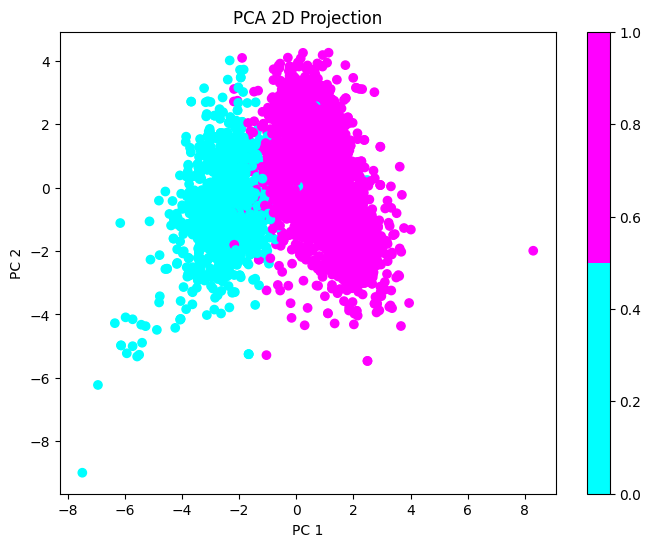

In [6]:
# 绘制PCA 2D图

print(type(X_train_pca))
plt.figure(figsize=(8, 6))
plt.scatter(np.asarray(X_train_pca)[:, 0], np.asarray(X_train_pca)[:, 1], c=y_train, cmap=plt.cm.get_cmap('cool', 2))
plt.colorbar()

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA 2D Projection")
plt.show()


C:\Users\86166\AppData\Local\Temp\ipykernel_13972\127781767.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap=plt.cm.get_cmap('cool', 2))
C:\Users\86166\.conda\envs\Python39\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


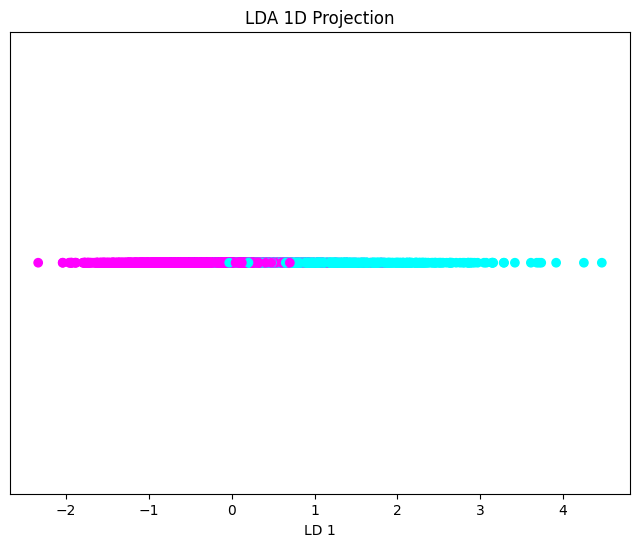

In [7]:

# 绘制LDA 1D图
# 绘制LDA 1D图

plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap=plt.cm.get_cmap('cool', 2))
plt.title("LDA 1D Projection")
plt.xlabel("LD 1")
plt.yticks([])
plt.show()

In [8]:
# 定义逻辑回归分类器
def logistic_regression(X, y, learning_rate=0.01, n_iterations=1000):

    y = y.reshape((-1, 1))
    
    # 初始化参数
    n_samples, n_features = X.shape
    w = np.zeros((n_features, 1))
    b = 0
    
    # 迭代优化
    for i in range(n_iterations):
        # 计算预测值
        z = X.dot(w) + b
        y_pred = 1 / (1 + np.exp(-z))
        
        # 计算损失函数
        cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        
        # 计算梯度
        dw = (1 / n_samples) * X.T.dot(y_pred - y)
        db = (1 / n_samples) * np.sum(y_pred - y)
        
        # 参数更新
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            print("Iteration %i: Cost=%f" % (i, cost))
    
    # 返回训练好的参数    
    return w, b

In [9]:
# 定义逻辑回归分类器
def logistic_regression_PCA(X, y, learning_rate=0.01, n_iterations=1000):

    y = y.reshape((-1, 1))
    
    # 初始化参数
    n_samples, n_features = X.shape
    w = np.zeros((n_features, 1))
    b = 0
    
    # 迭代优化
    for i in range(n_iterations):
        # 计算预测值
        z = X.dot(w) + b
        y_pred = 1 / (1 + np.exp(-z))
        
        # 不知道为什么 但是就是需要转置
        # 计算损失函数
        cost = (-1 / n_samples) * np.sum(y.T * np.log(y_pred) + (1 - y).T * np.log(1 - y_pred))
        
        # 计算梯度
        dw = (1 / n_samples) * X.T.dot(y_pred - y)
        db = (1 / n_samples) * np.sum(y_pred - y)
        
        # 参数更新
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            print("Iteration %i: Cost=%f" % (i, cost))
    
    # 返回训练好的参数    
    return w, b

In [10]:
def accuracy_score(y_true, y_pred):

    # 确保y_true和y_pred具有相同的形状
    assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape."
    
    # 计算精度得分
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    return accuracy

In [14]:
w_pca, b_pca = logistic_regression_PCA(X_train_pca, y_train)
y_pred_pca = np.round(1 / (1 + np.exp(-(X_test_pca.dot(w_pca) + b_pca))))
y_test = y_test.reshape(-1, 1)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy using PCA: %f" % accuracy_pca)

Iteration 0: Cost=0.693147
Iteration 100: Cost=0.415298
Iteration 200: Cost=0.311244
Iteration 300: Cost=0.256966
Iteration 400: Cost=0.223295
Iteration 500: Cost=0.200167
Iteration 600: Cost=0.183187
Iteration 700: Cost=0.170125
Iteration 800: Cost=0.159726
Iteration 900: Cost=0.151225
Accuracy using PCA: 0.973846


In [17]:
# 保存预测结果到数据框中
df = pd.DataFrame(y_pred_pca, columns=['prediction'])

# 将数据框保存为 csv 文件
df.to_csv("predictions_pca.csv", index=False)

In [12]:
w, b = logistic_regression(X_train, y_train)
y_pred = np.round(1 / (1 + np.exp(-(X_test.dot(w) + b))))
# 将二者类型统一
# 将它们转换为合适的类型
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Iteration 0: Cost=0.693147
Iteration 100: Cost=0.408408
Iteration 200: Cost=0.300008
Iteration 300: Cost=0.242772
Iteration 400: Cost=0.207007
Iteration 500: Cost=0.182353
Iteration 600: Cost=0.164235
Iteration 700: Cost=0.150307
Iteration 800: Cost=0.139237
Iteration 900: Cost=0.130210
Accuracy: 0.9856410256410256


In [15]:
# 保存预测结果到数据框中
df = pd.DataFrame(y_pred, columns=['prediction'])

# 将数据框保存为 csv 文件
df.to_csv("predictions.csv", index=False)

In [13]:
w_lda, b_lda = logistic_regression(X_train_lda, y_train)
y_pred_lda = np.round(1 / (1 + np.exp(-(X_test_lda.dot(w_lda) + b_lda))))

accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy using LDA: %f" % accuracy_lda)

C:\Users\86166\AppData\Local\Temp\ipykernel_13972\2651847589.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  print("Iteration %i: Cost=%f" % (i, cost))


Iteration 0: Cost=0.693147
Iteration 100: Cost=0.588579
Iteration 200: Cost=0.519186
Iteration 300: Cost=0.471321
Iteration 400: Cost=0.436897
Iteration 500: Cost=0.411184
Iteration 600: Cost=0.391350
Iteration 700: Cost=0.375635
Iteration 800: Cost=0.362904
Iteration 900: Cost=0.352400
Accuracy using LDA: 0.578462


In [16]:
# 保存预测结果到数据框中
df = pd.DataFrame(y_pred_lda, columns=['prediction'])

# 将数据框保存为 csv 文件
df.to_csv("predictions_lda.csv", index=False)

# Mindspore 使用

In [ ]:
print(y_train.shape)
print(X_train.shape)

In [ ]:
import mindspore
import mindspore.nn as nn
import mindspore.ops.operations as P
from mindspore.common.tensor import Tensor
from mindspore import Parameter, Model
import numpy as np
import mindspore.dataset as ds

class LogisticRegression(nn.Cell):
    def __init__(self, n_features, num_classes):
        super(LogisticRegression, self).__init__()
        w = Tensor(np.zeros((n_features, num_classes)))
        w = w.astype(mindspore.float32)
        b = Tensor(np.zeros((num_classes,)))
        b = b.astype(mindspore.float32)
        self.weight = Parameter(w, name="weight", requires_grad=True)
        self.bias = Parameter(b, name="bias", requires_grad=True)

    def construct(self, x):
        x = P.MatMul()(x, self.weight)
        x = P.Add()(x, self.bias)
        return x

n_features = 12
num_classes = 2
network = LogisticRegression(n_features, num_classes)

# 定义损失函数
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 定义优化器函数
net_opt = nn.Momentum(network.trainable_params(), learning_rate=0.01, momentum=0.9)

# 初始化模型参数
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'acc'})

# 训练模型
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig
from mindspore.train.callback import LossMonitor

batch_size = 1

# 加载数据并进行类型转换
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)

train_dataset = ds.NumpySlicesDataset((X_train, y_train), shuffle=True)
train_dataset = train_dataset.batch(batch_size=batch_size, drop_remainder=True, num_parallel_workers=8)
train_dataset = train_dataset.shuffle(buffer_size=train_dataset.get_dataset_size())

# 设置模型保存参数
config_ck = CheckpointConfig(save_checkpoint_steps=X_train.size, keep_checkpoint_max=5)

# 应用模型保存参数
ckpoint = ModelCheckpoint(prefix="Logist Regression", directory="./LogistModel", config=config_ck)

# 训练网络模型
model.train(batch_size, train_dataset, callbacks=[ckpoint, LossMonitor(1)])


In [ ]:
iterator = train_dataset.create_dict_iterator(output_numpy=True)

# 获取前四个元素
for i in range(4):
    data = next(iterator)
    # 打印第i个元素的内容和形状
    print(f"data {i} : {data}, shape: {[d.shape for d in data.values()]}")

In [ ]:
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

test_dataset = ds.NumpySlicesDataset((X_test, y_test), shuffle=False)
test_dataset = test_dataset.batch(batch_size=batch_size, drop_remainder=True, num_parallel_workers=8)

In [ ]:
# 定义测试函数
def test_model(model, test_dataset):

    num_correct = 0
    num_total = 0
    for data in test_dataset:
        inputs, labels = data
        outputs = model.predict(inputs)
        preds = np.argmax(outputs.asnumpy(), axis=1)
        num_correct += np.sum(preds == labels.asnumpy())
        num_total += len(labels)

    accuracy = num_correct / num_total
    print(f"Test accuracy: {accuracy:.4f}")

In [ ]:
# 在测试集上测试模型准确率
test_model(model, test_dataset)